## Part 1： 模型理论与应用
1. 在第一部分主要以证明和推导为主。以下几个问题都是比较经典的问题，会对模型的深入理解会有很大的帮助。 特别是对于逻辑回归的二次导数的求解过程可以用来证明一个函数是否凸函数。挑战一下吧！ 

2. 另外，试着也借助这个机会学习一下latex的使用，在后续写文档的时候后可以帮上很多忙， 双击每一个cell,就可以看到数学表达式。 小小建议：把简历也写成LATEX形式，显得更加专业。有一些线上的编辑器可以参考：https://www.sharelatex.com/templates/cv-or-resume

### Part 1.1 逻辑回归相关 (20分)
假设我们有训练数据$D=\{(\mathbf{x}_1,y_1),...,(\mathbf{x}_n,y_n)\}$, 其中$(\mathbf{x}_i,y_i)$为每一个样本，而且$\mathbf{x}_i$是样本的特征并且$\mathbf{x}_i\in \mathcal{R}^D$, $y_i$代表样本数据的标签（label）, 取值为$0$或者$1$. 在逻辑回归中，模型的参数为$(\mathbf{w},b)$。对于向量，我们一般用粗体来表达。请回答以下问题。最好用Markdown自带的Latex来编写。（如果实在不行，可以手写然后拍照完放入word或者转成PDF，作为独立的文件来提交）

(a) 在逻辑回归模型下，请写出目标函数（objective function）, 也就是我们需要"最小化"的目标（也称之为损失函数或者loss function)，不需要考虑正则 （3分）

$L(\mathbf{w},b)=argmin_{w,b}-\sum_{i=1}^{n}ylog(P(y=1)|X;w,b)+(1-y)log(1-P(y=1)|X;w,b)$  
其中$P(y=1|X;w,b)=\frac{1}{1+e^{-(w^{T}x+b)}}$

(b) 求出$L(\mathbf{w},b)$的梯度（或者计算导数），需要必要的中间过程。（3分）

$\frac{\partial L(\mathbf{w},b)}{\partial \mathbf{w}}=-\sum_{i=1}^{n}(y_{i}\cdot \frac{f(w^{T}x_{i}+b)\cdot (1-f(w^{T}x_{i}+b))\cdot x_{i}}{f(w^{T}x+b)}+(y_{i}-1)\cdot \frac{f(w^{T}x_{i}+b)\cdot (1-f(w^{T}x_{i}+b))\cdot x_{i}}{f(1-f(w^{T}x_{i}+b))})$  
$\frac{\partial L(\mathbf{w},b)}{\partial \mathbf{w}}=-\sum_{i=1}^{n}(y_{i}\cdot (1-f(w^{T}x_{i}+b))\cdot x_{i}+(y_{i}-1)f(w^{T}x_{i}+b)\cdot x_{i})$  
$\frac{\partial L(\mathbf{w},b)}{\partial \mathbf{w}}=\sum_{i=1}^{n}((f(w^{T}x_{i}+b)-y_{i})\cdot x_{i})$

$\frac{\partial L(\mathbf{w},b)}{\partial \mathbf{b}}=-\sum_{i=1}^{n}(y_{i}\cdot \frac{f(w^{T}x_{i}+b)\cdot (1-f(w^{T}x_{i}+b))}{f(w^{T}x_{i}+b)}+(y_{i}-1)\cdot \frac{f(w^{T}x_{i}+b)\cdot (1-f(w^{T}x_{i}+b))}{f(1-f(w^{T}x_{i}+b))})$  
$\frac{\partial L(\mathbf{w},b)}{\partial \mathbf{b}}=-\sum_{i=1}^{n}(y_{i}\cdot (1-f(w^{T}x_{i}+b))+(y_{i}-1)f(w^{T}x_{i}+b))$  
$\frac{\partial L(\mathbf{w},b)}{\partial \mathbf{b}}=\sum_{i=1}^{n}(f(w^{T}x_{i}+b)-y_{i})$

(c) 请写出基于梯度下降法（batch）的对于$\mathbf{w}$和$b$的更新 （3分）

$w^{t+1}=w^{t}-\eta_{t} \sum_{i=1}^{n}((f(w^{T}x_{i}+b)-y_{i})\cdot x_{i})$

$b^{t+1}=b^{t}-\eta_{t} \sum_{i=1}^{n}(f(w^{T}x_{i}+b)-y_{i})$

(d) 假设在(a)的基础上加了一个L2正则项，请写出基于梯度下降法（batch）的对于$\mathbf{w}$和$b$的更新 （3分）

$w^{t+1}=w^{t}-\eta_{t} \sum_{i=1}^{n}((f(w^{T}x_{i}+b)-y_{i})\cdot x_{i}) + \lambda w$

$b^{t+1}=b^{t}-\eta_{t} \sum_{i=1}^{n}(f(w^{T}x_{i}+b)-y_{i})$

接下来我们来证明逻辑回归函数是凸函数。假设一个函数是凸函数，我们则可以得出局部最优解即为全局最优解，所以假设我们通过随机梯度下降法等手段找到最优解
时我们就可以确认这个解就是全局最优解。证明凸函数的方法有很多种，在这里我们介绍一种方法，就是基于二次求导大于等于0。比如给定一个函数$f(x)=x^2-3x+3$，做两次
求导之后即可以得出$f''(x)=2 > 0$，所以这个函数就是凸函数。类似的，这种理论也应用于多元变量中的函数上。在多元函数上，只要证明二阶导数是posititive semidefinite即可以。

(e) 在(b)的基础上接着对$\mathbf{w}$求导（等于二阶导数，二阶导数的维度为$D\times D$），这个二阶导数也称之为Hessian Matrix(https://en.wikipedia.org/wiki/Hessian_matrix) 对于矩阵、向量的求导请参考：https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf （4分）


$\frac{\partial^2 \mathcal{L}}{\partial^2 \mathbf{w}}=$

(f) 请说明在(e)的得出来的Hessian Matrix是Positive Definite. 提示：为了证明一个$D\times D$的矩阵$H$为Positive Semidefinite，需要证明对于任意一个非零向量$v\in \mathcal{R}^D$, 需要得出$v^{T}Hv >=0$ （4分）

请推导或者说明：

## Part 2： 情感分析项目 (80分)

本项目的目标是基于用户提供的评论，通过算法自动去判断其评论是正面的还是负面的情感。比如给定一个用户的评论：
- 评论1： “我特别喜欢这个电器，我已经用了3个月，一点问题都没有！”
- 评论2： “我从这家淘宝店卖的东西不到一周就开始坏掉了，强烈建议不要买，真实浪费钱”

对于这两个评论，第一个明显是正面的，第二个是负面的。 我们希望搭建一个AI算法能够自动帮我们识别出评论是正面还是负面。

情感分析的应用场景非常丰富，也是NLP技术在不同场景中落地的典范。比如对于一个证券领域，作为股民，其实比较关注舆论的变化，这个时候如果能有一个AI算法自动给网络上的舆论做正负面判断，然后把所有相关的结论再整合，这样我们可以根据这些大众的舆论，辅助做买卖的决策。 另外，在电商领域评论无处不在，而且评论已经成为影响用户购买决策的非常重要的因素，所以如果AI系统能够自动分析其情感，则后续可以做很多有意思的应用。 

情感分析是文本处理领域经典的问题。整个系统一般会包括几个模块：
- 数据的抓取： 通过爬虫的技术去网络抓取相关文本数据
- 数据的清洗/预处理：在本文中一般需要去掉无用的信息，比如各种标签（HTML标签），标点符号，停用词等等
- 把文本信息转换成向量： 这也成为特征工程，文本本身是不能作为模型的输入，只有数字（比如向量）才能成为模型的输入。所以进入模型之前，任何的信号都需要转换成模型可识别的数字信号（数字，向量，矩阵，张量...)
- 选择合适的模型以及合适的评估方法。 对于情感分析来说，这是二分类问题（或者三分类：正面，负面，中性），所以需要采用分类算法比如逻辑回归，朴素贝叶斯，神经网络，SVM等等。另外，我们需要选择合适的评估方法，比如对于一个应用，我们是关注准确率呢，还是关注召回率呢？ 

在本次项目中，我们已经给定了训练数据和测试数据，它们分别是 train.positive.txt, train.negative.txt， test_combined.txt. 请注意训练数据和测试数据的格式不一样，详情请见文件内容。 整个项目你需要完成以下步骤：

数据的读取以及清洗： 从给定的.txt中读取内容，并做一些数据清洗，这里需要做几个工作： （1） 文本的读取，需要把字符串内容读进来。 （2）去掉无用的字符比如标点符号，多余的空格，换行符等 （3） 分词
把文本转换成TF-IDF向量： 这部分直接可以利用sklearn提供的TfidfVectorizer类来做。
利用逻辑回归模型来做分类，并通过交叉验证选择最合适的超参数
利用支持向量机做分类，并通过交叉验证选择神经网络的合适的参数

### File Reading: 文本读取 （5分）

In [1]:
from warnings import filterwarnings
filterwarnings('ignore') # 不打印警告

def ReadTxtName(rootdir, label_choice):
    
    lines = []  
    with open(rootdir, 'r',encoding='UTF-8-sig') as file_to_read: # UTF-8-sig 是为了避免开头出现\ufeff 
        while True:
            line = file_to_read.readline()
            if not line: # 读取所有的内容           
                break
            if 'review id' in str(line): # 评论开始（每个评论在review与review之间）
                if label_choice == 'combined': # 标注标签
                    label = int(line[-4])
                elif label_choice == 'positive':
                    label = 1
                else:
                    label = 0
                temp_comment = ''
                while True: # 为了避免评论换行
                    line = file_to_read.readline()
                    if 'review' in str(line): # 评论结束
                        break
                    if 'review' not in str(line):
                        temp_comment += str(line)

                lines.append([label,temp_comment.strip('\n')])               
    return lines

def process_file():
    """
    读取训练数据和测试数据，并对它们做一些预处理
    """    
    train_pos_file = "./data/train_positive.txt"
    train_neg_file = "./data/train_negative.txt"
    test_comb_file = "./data/test_combined.txt"
    
    train_pos_comments = ReadTxtName(train_pos_file, 'positive')
    train_neg_comments = ReadTxtName(train_neg_file, 'negative')
    combined_comments = ReadTxtName(test_comb_file, 'combined')
#     print(test_comments)

    # TODO: 读取文件部分，把具体的内容写入到变量里面
    train_comments = []
    train_labels = []
    test_comments = []
    test_labels = []
    for comment in train_pos_comments:
        train_comments.append(comment[1])
        train_labels.append(comment[0])
    for comment in train_neg_comments:
        train_comments.append(comment[1])
        train_labels.append(comment[0])
    for comment in combined_comments:
        test_comments.append(comment[1])
        test_labels.append(comment[0])
    return train_comments,train_labels,test_comments,test_labels,train_pos_comments,train_neg_comments
train_comments,train_labels,test_comments,test_labels,train_pos_comments,train_neg_comments = process_file()

### Explorary Analysis: 做一些简单的可视化分析 （10分） 

In [2]:
# 训练数据和测试数据大小
print (len(train_comments), len(test_comments))

8065 2500


In [3]:
len(train_comments[0])

14

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\00124175\AppData\Local\Temp\jieba.cache
Loading model cost 0.718 seconds.
Prefix dict has been built succesfully.


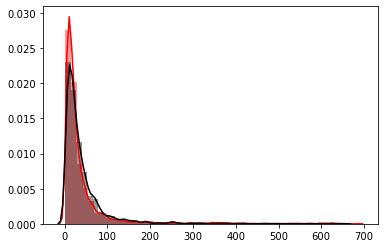

In [4]:
# TODO: 对于训练数据中的正负样本，分别画出一个histogram， histogram的x抽是每一个样本中字符串的长度，y轴是拥有这个长度的样本的百分比。
#       并说出样本长度是否对情感有相关性 (需要先用到结巴分词)
#       参考：https://en.wikipedia.org/wiki/Histogram
import jieba

def count_sentence(sentences):
    # 计算字符串的长度
    length = []
    for comment in sentences:  
        seg_list = jieba.cut(comment[1], cut_all=False) # 精确模式
        temp_words_length = []
        for word in seg_list:
            temp_words_length.append(word)
        length.append(len(temp_words_length))
    return  length  

pos_count_list = count_sentence(train_pos_comments)
neg_count_list = count_sentence(train_neg_comments)

import seaborn as sns
%matplotlib inline
sns.distplot(pos_count_list, color="r") # 画直方图和核密度图
sns.distplot(neg_count_list, color="black")

In [5]:
# TODO： 分别列出训练数据中正负样本里的top 20单词（可以做适当的stop words removal）。 
# the histogram of the data
def count_words(sentences):
    # 计算词频
    word_dict = {}
    for comment in sentences:  
        seg_list = jieba.cut(comment[1], cut_all=False) # 精确模式
        for word in seg_list:
            #对word出现的频率进行统计，当word不在words时，返回值是0，当word在words中时，返回+1，以此进行累计计数
            word_dict[word] = word_dict.get(word, 0) + 1 
    word_sorted = sorted(word_dict.items(),key=lambda k:k[1],reverse=True) #按词频排序
    return word_sorted

pos_word_count_dic = count_words(train_pos_comments)
neg_word_count_dic = count_words(train_neg_comments)

stop_words = []
for i,values in enumerate(zip(pos_word_count_dic,neg_word_count_dic)):
    stop_words.append(values[0][0])
    stop_words.append(values[1][0])
    if i == 20:
        break
print(set(stop_words))

{'了', '也', '的', '！', '不', '不错', '好', '没有', '都', '\n', ',', '？', '我', '有', '!', '。', '是', '，', '.', '在', '就', '买', '~', '很', ' '}


In [6]:
stop_words = ['了','很', '买','我', '有', '的', '就', '在','都', '也','是'] # 根据top20手动添加

##### Text Cleaning: 文本处理部分 （10分）

In [7]:
# TODO：对于train_comments, test_comments进行字符串的处理，几个考虑的点：
#   1. 停用词过滤
#   2. 去掉特殊符号
#   3. 去掉数字（比如价格..)
#   4. ...
#   需要注意的点是，由于评论数据本身很短，如果去掉的太多，很可能字符串长度变成0
#   预处理部分，可以自行选择合适的方.
import re,string
 
re_punctuation = re.compile(
        r"[!\"#$%&\'()*+,-./:;<=>?@~`[\\\]_{|}—！，。？～、￥…（）：【】《》‘’“”\s]+") # 去除标点符号
def removePunctuation(text):
    text =  re_punctuation.sub("", text)# 第一个参数是正则表达式(可以放前边)，第二个替换后的词，第三个是string
    return text # 去除空格

# 预处理
def preprocessing(lst):
    new_comment = []
    for comment in lst:
        comment = removePunctuation(comment) # 去除标点
        seg_list = jieba.cut(comment, cut_all=False) # 精确模式
        temp_comment =''
        for word in seg_list:
            if word not in stop_words and word.isdigit() == False: # 过滤数字和停用词
                temp_comment += ' ' + word
        new_comment.append(temp_comment)
    return new_comment
    
train_comments_new = preprocessing(train_comments)
test_comments_new = preprocessing(test_comments)

### 词汇统计（第一种方法）

196198
不


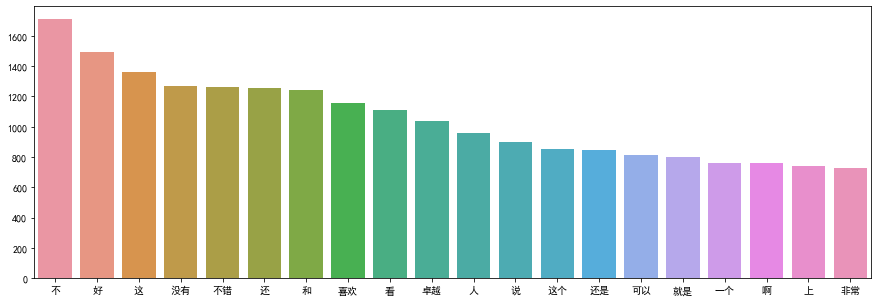

In [8]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

def countWords(comments):
    total = 0
    word_dict = {}
    for comment in comments:
        for item in comment.split( ):
            #对word出现的频率进行统计，当word不在words时，返回值是0，当word在words中时，返回+1，以此进行累计计数
            word_dict[item] = word_dict.get(item, 0) + 1 
            total += 1
    word_sorted = sorted(word_dict.items(),key=lambda k:k[1],reverse=True) #按词频排序
    return total,word_sorted

total,word_sorted = countWords(train_comments_new)
print(total)
print(word_sorted[0][0])
# 获取前排名前20的单词
words = []
freqencys = []
i = 0
for (word,freqency) in word_sorted:
    if i < 20:
        words.append(word)
        freqencys.append(freqency)
    i += 1
plt.figure(figsize=(15,5))
sns.barplot(words, freqencys) # sns内部不支持dict_keys与dict_values,matplotlib.bar可以

### 词汇统计（第二种方法）

In [9]:
from itertools import chain
from collections import Counter

train_comments_new_tolist = []
[train_comments_new_tolist.append(comment.split()) for comment in train_comments_new] # 字符串切开转化为list
comment_words_1d = list(chain.from_iterable(train_comments_new_tolist)) # 数据扁平化
print(f'总词汇量：{len(comment_words_1d)}')
count_words = Counter(comment_words_1d) # 统计词频
print(f'不重复词汇的数量：{len(count_words)}')
common = count_words.most_common(50)
print(common)

总词汇量：196198
不重复词汇的数量：26830
[('不', 1708), ('好', 1493), ('这', 1361), ('没有', 1271), ('不错', 1262), ('还', 1258), ('和', 1241), ('喜欢', 1159), ('看', 1107), ('卓越', 1039), ('人', 958), ('说', 898), ('这个', 851), ('还是', 848), ('可以', 810), ('就是', 799), ('一个', 763), ('啊', 763), ('上', 739), ('非常', 725), ('你', 697), ('要', 668), ('但', 660), ('用', 639), ('让', 635), ('书', 633), ('本书', 629), ('感觉', 617), ('到', 613), ('对', 601), ('他', 594), ('能', 590), ('会', 584), ('给', 581), ('质量', 573), ('不是', 572), ('什么', 556), ('但是', 532), ('自己', 524), ('没', 517), ('现在', 516), ('听', 516), ('内容', 504), ('中', 487), ('多', 484), ('而且', 482), ('吧', 479), ('我们', 474), ('想', 462), ('时候', 459)]


In [47]:
# train_comments_new
print(train_comments_new[0])
print(log(1/len(comment_words_1d)))
# count_words
count_words['这机']

 请问 这机 不是 有个 遥控器 吗
-12.186879632381526


2

### 生成词云图

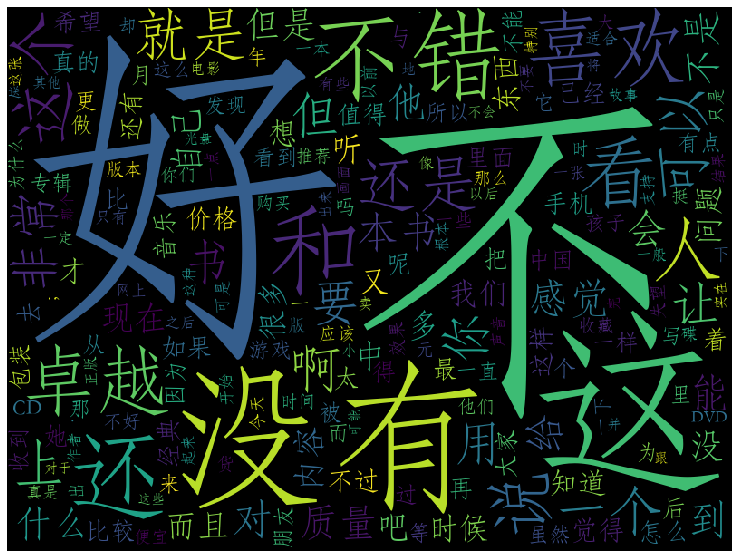

In [10]:
# 生成词云图
from wordcloud import WordCloud

join_words = " ".join(comment_words_1d)
wc = WordCloud(font_path=r'C:\Windows\Fonts\STFANGSO.ttf',width=800,height=600) # 指定文件的位置
img = wc.generate_from_frequencies(count_words) # 根据词频生成
# img = wc.generate(join_words)
plt.figure(figsize = (15, 10))
plt.imshow(img)
plt.axis('off')
# 将图像保存到本地
wc.to_file('wordcloud.png')


### Feature Extraction : 从文本中提取特征 （10分）

In [11]:
# TODO: 利用tf-idf从文本中提取特征,写到数组里面. 
#       参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer =  TfidfVectorizer()# 定一个tf-idf的vectorizer
X = vectorizer.fit_transform(train_comments_new)  # 结果存放在X矩阵
x_mat = X.toarray()

y = vectorizer.transform(test_comments_new)
y_mat = y.toarray()

X_train =  x_mat # 训练数据的特征
y_train =  np.array(train_labels).reshape(-1,1)  # 训练数据的label  
X_test =   y_mat# 测试数据的特征
y_test =   np.array(test_labels).reshape(-1,1) # 测试数据的label

print ('训练集X:',np.shape(X_train), '测试集X:',np.shape(X_test), '训练集y:',np.shape(y_train), '测试集y:',np.shape(y_test))

训练集X: (8065, 24999) 测试集X: (2500, 24999) 训练集y: (8065, 1) 测试集y: (2500, 1)


### Modeling: 训练模型以及选择合适的超参数 （25分）

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state
# TODO： 利用逻辑回归来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       逻辑回归的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       对于逻辑回归，经常调整的超参数为： C
random_state = check_random_state(0)
#np.random.permutation(x) 随机排列一个序列，或者数组。
permutation = random_state.permutation(X.shape[0])
X_train = X_train[permutation]
y_train = y_train[permutation]

# 参数C是正则化项参数的倒数, C的数值越小, 惩罚的力度越大. penalty可选L1, L2正则化项, 默认是L2正则化
# 参数solver可选{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}这5个优化算法
# newton-cg, lbfgs是拟牛顿法, liblinear是坐标轴下降法, sag, saga是随机梯度下降法, saga可以适用于L1和L2正则化项, 而sag只能用于L2正则化项
clf = LogisticRegression() # C=1.0, penalty='l1', solver='saga', tol=0.1
param_dist = {
    'max_iter':[20,40], # 训练步数
    'C':[0.1,1,5,10] # 正则系数
}
# 使用测试集对模型进行验证，并利用GridSearchCV技术对逻辑回归模型进行超参调优，
#网格搜索最优超参数
best_g = GridSearchCV(LogisticRegression(),param_dist,cv=5)
best_g.fit(X_train,y_train)
print(best_g.best_params_)#输出最优参数

{'C': 1, 'max_iter': 20}


AUC: 0.8375504
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      1250
           1       0.67      0.91      0.77      1250

    accuracy                           0.73      2500
   macro avg       0.76      0.73      0.72      2500
weighted avg       0.76      0.73      0.72      2500



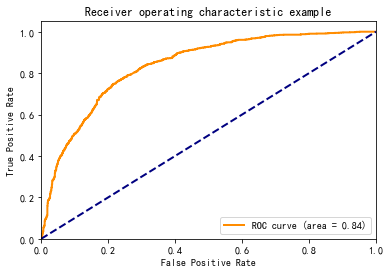

In [14]:
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')#处理警告

best_model = LogisticRegression(max_iter = 20,C = 1)
best_model.fit(X_train,y_train)
y_predict = best_model.predict(X_test)
best_yH = best_model.predict_proba(X_test) # predict_proba返回两列，分别表示正负样本的概率(用于画ROC)
# 并输出测试数据集的精确率、召回率、F1值、AUC值，画出ROC曲线
# print('精准率:',precision_score(y_test,y_predict)) 
# print('召回率:',recall_score(y_test,y_predict))
# print('F1率:',f1_score(y_test,y_predict))
print('AUC:',roc_auc_score(y_test,best_yH[:,-1]))
print(classification_report(y_test, y_predict))

#画出ROC曲线
# fpr,tpr,thresholds 分别为假正率、真正率和阈值。
y_0=list(best_yH[:,1])    #取第二列数据，因为第二列概率为趋于0时分类类别为0，概率趋于1时分类类别为1
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_0)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # 画对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [16]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# TODO： 利用SVM来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel
# C: 目标函数的惩罚系数，kernel：参数选择有RBF, Linear, Poly, Sigmoid, 默认的是"RBF"，
# gamma：核函数的系数('Poly', 'RBF' and 'Sigmoid'), 默认是gamma = 1 / n_features,gamma越大，支持向量越少，gamma值越小，支持向量越多
parameters = {
    'kernel':['linear', 'rbf'], 
    'C': [1, 3, 5],
    'gamma': [ 0.001, 0.1, 1, 10],
    'max_iter':[20,40,60] # 训练步数
}
svc = svm.SVC()
grid = GridSearchCV(svc, parameters, cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_) # 最佳结果的参数组合
best_model = grid.best_estimator_ # 最佳模型
best_model.predict(test_data)

# grid.scores # 给出不同参数组合下的评价结果 
# grid.best_score_# 最佳评价得分 
 

{'C': 3, 'gamma': 0.001, 'kernel': 'linear', 'max_iter': 60}


NameError: name 'test_data' is not defined

AUC: 0.6637968000000001
              precision    recall  f1-score   support

           0       0.70      0.17      0.28      1250
           1       0.53      0.93      0.67      1250

    accuracy                           0.55      2500
   macro avg       0.61      0.55      0.47      2500
weighted avg       0.61      0.55      0.47      2500



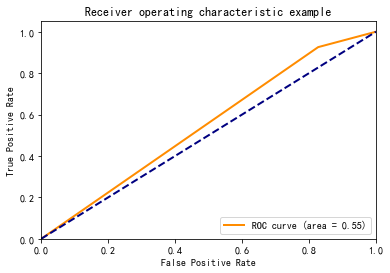

In [30]:
from sklearn import svm

best_model = svc = svm.SVC(kernel='rbf', C = 1, gamma = 0.1 ,probability=True,max_iter = 40) # 不加probability预测会出错
best_model.fit(X_train[0:5000,:],y_train[0:5000,:])
y_predict = best_model.predict(X_test)
best_yH = best_model.predict_proba(X_test) # predict_proba返回两列，分别表示正负样本的概率
# 并输出测试数据集的精确率、召回率、F1值、AUC值，画出ROC曲线
# print('精准率:',precision_score(y_test,y_predict)) 
# print('召回率:',recall_score(y_test,y_predict))
# print('F1率:',f1_score(y_test,y_predict))
print('AUC:',roc_auc_score(y_test,best_yH[:,-1]))
print(classification_report(y_test, y_predict))

#画出ROC曲线
# fpr,tpr,thresholds 分别为假正率、真正率和阈值。
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # 画对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [31]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.37      0.53      1250
           1       0.61      0.97      0.75      1250

    accuracy                           0.67      2500
   macro avg       0.77      0.67      0.64      2500
weighted avg       0.77      0.67      0.64      2500



对于超参数的调整，我们经常使用gridsearch，这也是工业界最常用的方法，但它的缺点是需要大量的计算，所以近年来这方面的研究也成为了重点。 其中一个比较经典的成果为Bayesian Optimization（利用贝叶斯的思路去寻找最好的超参数）。Ryan P. Adams主导的Bayesian Optimization利用高斯过程作为后验概率（posteior distribution）来寻找最优解。 https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf 在下面的练习中，我们尝试使用Bayesian Optimization工具来去寻找最优的超参数。参考工具：https://github.com/fmfn/BayesianOptimization

In [32]:
# TODO: 仍然使用SVM模型，但在这里使用Bayesian Optimization来寻找最好的超参数。 
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用Bayesian Optimization https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel
#       参考Bayesian Optimization开源工具： https://github.com/fmfn/BayesianOptimization
from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.svm import SVC

def svm_cv(C, gamma):
    svm = SVC(C=10 ** C, gamma=10 ** gamma,random_state=1,max_iter = 20)
    # 如果估计器是一个分类器，并且y是二进制或多类，使用 cv=StratifiedKFold(n_splits=5) 等价于cv = 5
    # 其它情况使用cv = KFold(n_splits=5)
    val = cross_val_score(svm,X_train[0:5000,:], y_train[0:5000,:], cv=5).mean() # (交叉验证)返回每次运行的评分数组
    return val

pbounds = {'C':(0.1,10),'gamma':(0.001,20)}
svm_bo = BayesianOptimization(svm_cv,pbounds=pbounds)
svm_bo.maximize()


|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        |  0.6242   |  1.842    |  10.48    |
|  2        |  0.6242   |  6.505    |  4.486    |
|  3        |  0.6242   |  1.209    |  11.62    |
|  4        |  0.6242   |  1.181    |  14.06    |
|  5        |  0.6242   |  0.1294   |  17.39    |
|  6        |  0.6164   |  9.839    |  0.01698  |
|  7        |  0.6242   |  9.947    |  20.0     |
|  8        |  0.624    |  0.2123   |  0.006119 |
|  9        |  0.6242   |  0.134    |  19.8     |
|  10       |  0.6242   |  9.919    |  19.92    |
|  11       |  0.6242   |  0.1249   |  7.349    |
|  12       |  0.6242   |  5.46     |  19.99    |
|  13       |  0.6242   |  0.1081   |  9.136    |
|  14       |  0.621    |  0.1173   |  0.2714   |
|  15       |  0.6242   |  9.931    |  19.85    |
|  16       |  0.6242   |  0.1923   |  19.96    |
|  17       |  0.6242   |  0.1189   |  11.69    |
|  18       |  0.6242   |  5.131    |  19.99    |


In [21]:
from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.linear_model import LogisticRegression

def LogisticReg(C, max_iter):

    model = LogisticRegression(C = C, max_iter = int(max_iter))
    # 如果估计器是一个分类器，并且y是二进制或多类，使用 cv=StratifiedKFold(n_splits=5) 等价于cv = 5
    # 其它情况使用cv = KFold(n_splits=5)
    val = cross_val_score(model,X_train, y_train, cv=5).mean() # (交叉验证)返回每次运行的评分数组
    return val

pbounds = {'C':(0.1,10),'max_iter':(20,60) }
lr_bo = BayesianOptimization(LogisticReg,pbounds=pbounds)
lr_bo.maximize()


|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
|  1        |  0.7654   |  2.698    |  52.74    |
|  2        |  0.7632   |  4.85     |  32.08    |
|  3        |  0.7645   |  3.066    |  29.55    |
|  4        |  0.7645   |  1.041    |  29.39    |
|  5        |  0.7626   |  6.466    |  24.89    |
|  6        |  0.7448   |  0.4243   |  59.9     |
|  7        |  0.7588   |  9.952    |  59.95    |
|  8        |  0.696    |  0.1509   |  20.03    |
|  9        |  0.663    |  0.1      |  42.24    |
|  10       |  0.759    |  10.0     |  46.87    |
|  11       |  0.759    |  10.0     |  30.42    |
|  12       |  0.7586   |  9.906    |  20.1     |
|  13       |  0.7587   |  9.896    |  54.27    |
|  14       |  0.7631   |  5.306    |  59.9     |
|  15       |  0.759    |  9.986    |  38.54    |
|  16       |  0.7628   |  6.2      |  51.32    |
|  17       |  0.764    |  4.004    |  56.09    |
|  18       |  0.759    |  9.999    |  24.35    |


In [23]:
# 寻找最大值：
index = []
for i in lr_bo.res:
    index.append(i['target'])
max_index = index.index(max(index))
print(max_index)

0


In [24]:
best_model = LogisticRegression(max_iter = 53,C = 2.7)
best_model.fit(X_train,y_train)
y_predict = best_model.predict(X_test)
best_yH = best_model.predict_proba(X_test) # predict_proba返回两列，分别表示正负样本的概率(用于画ROC)
print('AUC:',roc_auc_score(y_test,best_yH[:,-1]))
print(classification_report(y_test, y_predict))

AUC: 0.83574304
              precision    recall  f1-score   support

           0       0.84      0.59      0.69      1250
           1       0.68      0.89      0.77      1250

    accuracy                           0.74      2500
   macro avg       0.76      0.74      0.73      2500
weighted avg       0.76      0.74      0.73      2500



### 特征: 添加n-gram特征 (10分)
在原有tf-idf特征的基础上，添加n-gram特征（在这里我们使用bi-gram特征）。添加完之后效果是否有提升？ 为什么？

In [ ]:
X_train =  # 添加完bigram之后的特征
y_train =  # 
X_test =   # 添加完bigram之后的特征
y_test =   # 

print (np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

In [27]:
## TODO 模型的训练，如上
X_train[0:5000,:].shape

(5000, 24999)

### Extension （10分）
1. 对于情感分析来说，有一个问题也很重要，比如一个句子里出现了 “我不太兴奋”， “不是很满意”。 在这种情况，因为句子中出现了一些积极的词汇很可能被算法识别成正面的，但由于前面有一个“不”这种关键词，所以否定+肯定=否定，算法中这种情况也需要考虑。另外，否定+否定=肯定， 这种情况也一样。 
2. 另外一个问题是aspect-based sentiment analysis, 这个指的是做情感分析的时候，我们既想了解情感，也想了解特定的方面。 举个例子： “这部手机的电池性能不错，但摄像不够清晰啊!”, 分析完之后可以得到的结论是： “电池：正面， 摄像：负面”， 也就是针对于一个产品的每一个性能做判定，这种问题我们叫做aspect-based sentiment analysis，也是传统情感分析的延伸。

Q: 对于如上两个问题，有什么解决方案？ 大概列一下能想到的处理方案。 

TODO






### 拓展建议
如果想挑战一下自己，把上述的问题也实现一下，但不计为本项目的分数。建议好好整理一下代码，上传到github。 

### 其他领域
跟情感分析类似的领域有叫affective computing, 也就是用来识别情绪(emotion recognition)。但情感和情绪又不太一样，情绪指的是高兴，低落，失落，兴奋这些人的情绪。我们知道真正的人工智能是需要读懂人类的情绪的。而且情绪识别有很多场景，比如服务机器人根据不同的情绪来跟用户交流； 无人驾驶里通过识别用户的情绪（摄像头或者声音或者传感器）来保证安全驾驶； IOT领域里设备也需要读懂我们的情绪； 微博里通过文本读懂每个人发文时的情绪。 

总体来讲，情绪识别跟情感识别所用到的技术是类似的，感兴趣的小伙伴，也可以关注一下这个领域。 如果想发论文，强烈建议选择情绪方面的，不建议选择情感分析，因为问题太老了。情绪分析是近几年才开始受关注的领域。 